<a href="https://colab.research.google.com/github/peiningyang/Project-6-No-Code-Low-Code/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data
This will download the script of season 1 of the TV show *Friends*. 

In [1]:
!wget https://raw.githubusercontent.com/peiningyang/Project-6-No-Code-Low-Code/main/friends-season-1.txt

--2021-09-21 01:22:30--  https://raw.githubusercontent.com/peiningyang/Project-6-No-Code-Low-Code/main/friends-season-1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474941 (464K) [text/plain]
Saving to: ‘friends-season-1.txt’

friends-season-1.tx 100%[===================>] 463.81K  --.-KB/s    in 0.04s   

2021-09-21 01:22:31 (11.3 MB/s) - ‘friends-season-1.txt’ saved [474941/474941]



In [2]:
!head friends-season-1.txt

The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)

[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]

Monica: There's nothing to tell! He's just some guy I work with!

Joey: C'mon, you're going out with the guy! There's gotta be something wrong with him!

Chandler: All right Joey, be nice.  So does he have a hump? A hump and a hairpiece?



In [4]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
from pathlib import Path
import spacy


In [13]:
friends_txt = Path("friends-season-1.txt").read_text(encoding="ISO-8859-1")

## Word Visualizations

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [7]:
# remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [8]:
stop_words = stopwords.words('english')

In [15]:
friends_blob = TextBlob(Path("friends-season-1.txt").read_text(encoding="ISO-8859-1"))

In [19]:
friends_count = friends_blob.word_counts.items()

In [20]:
len(friends_count)

5982

In [21]:
# remove stop words
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop


In [22]:
no_stop_words = remove_stop(friends_count)

In [23]:
len(no_stop_words)

5849

In [24]:
no_stop_words[0:10]

['one',
 'monica',
 'gets',
 'new',
 'roommate',
 'pilot-the',
 'uncut',
 'version',
 'scene',
 'central']

## Word Cloud

In [25]:
from wordcloud import WordCloud

In [26]:
word_cloud_text = str1 = ' '.join(no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

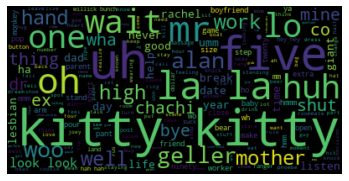

In [27]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")